Caixeiro viajante com gasolina infinita
========================================



## Introdução



Já havíamos resolvido o problema do caixeiro viajante no experimento A.06, aqui, porém, queremos achar o caminho de maior distância que ele pode percorrer (e aqui não temos a limitação da gasolina!).

Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Objetivo



 Encontre o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica.]

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [25]:
import random
from itertools import permutations
from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_roleta_max as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao
import matplotlib.pyplot as plt

#Parte das importações das funções do arquivo funções.py.

## Códigos e discussão



In [26]:
### CONSTANTES

#Constantes relacionadas à busca:
TAMANHO_POPULACAO = 50
NUMERO_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

#Constantes relacionadas ao problema a ser resolvido:
NUMERO_CIDADES = 5 #Número de cidades que serão consideradas no "mapa" do caixeiro viajante, pelas quais ele tem que passar.
CIDADES = cria_cidades(NUMERO_CIDADES) #As cidades serão criadas por esssa função que gera uma cidade (indivíduo) com as suas coordenadas cartesinas (genes).

In [27]:
#Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [28]:
#Aqui realizamos uma busca por algoritmo genético, envolvendo todas as partes já vistas anteriormente:

populacao = cria_populacao_inicial(TAMANHO_POPULACAO, CIDADES) #A população inicial aqui será criada baseada no número de cidades, igual fizemos nos anteriores considerando indivíduos.

melhor_fitness_ja_visto = -float("inf")  #Melhor jeito de escrever infinito em Python é com esse float("inf").

for n in range(NUMERO_GERACOES): #Para cada elemento no número de gerações, faça:
    
    #Parte da seleção:
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    #Parte do cruzamento:
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    #Parte da mutação:
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    #Melhor individuo já visto até agora:
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness

In [29]:
#Busca testando todas as permutações (parte exaustiva do algoritmo):
melhor_fitness_ever = -float("inf")

#Aqui testando todas as permutações possíveis, ou seja, o cálculo de todas os conjuntos de pontos possíveis:
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [30]:
#Parte da checagem dos resultados:

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 4', 'Cidade 1', 'Cidade 2', 'Cidade 3', 'Cidade 0'] com distância: 3.985395654328618

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 1', 'Cidade 4') com distância: 3.985395654328618


[(0.9821539889983917, 0.8970384631778751), (0.09763041231109493, 0.5165337029361026), (0.9894020161601986, 0.5205123677011275), (0.7714925380949857, 0.8241988383123955), (0.22925830135674963, 0.26867917515992235)]


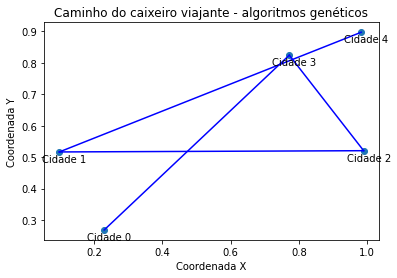

In [31]:
#Pegando as coordenadas dos pontos da resposta dada pelo Algoritmo Genético:
grafo = []
for i in melhor_individuo_ja_visto:
    grafo.append(CIDADES[str(i)])
print(grafo)
#Lista com as coordenadas dos pontos:
lista_pontos = grafo

#Coordenadas X e Y dos pontos:
x = [ponto[0] for ponto in lista_pontos]
y = [ponto[1] for ponto in lista_pontos]
for i, nome in enumerate(melhor_individuo_ja_visto):
    plt.annotate(nome, (x[i], y[i]), textcoords="offset points", xytext=(5,-10), ha='center')

#Plotagem dos pontos:
plt.scatter(x, y)

#Ligamos os pontos com uma reta entre eles:
for i in range(len(lista_pontos)-1):
    plt.plot([lista_pontos[i][0], lista_pontos[i+1][0]],
             [lista_pontos[i][1], lista_pontos[i+1][1]], 'b-')

#Define os rótulos dos eixos:
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Caminho do caixeiro viajante - algoritmos genéticos')
#Plotagem do gráfico:
plt.show()

[(0.22925830135674963, 0.26867917515992235), (0.7714925380949857, 0.8241988383123955), (0.9894020161601986, 0.5205123677011275), (0.09763041231109493, 0.5165337029361026), (0.9821539889983917, 0.8970384631778751)]


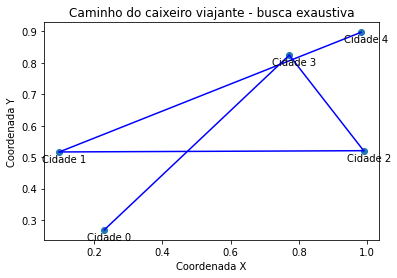

In [32]:
#Pegando as coordenadas dos pontos da resposta dada pelo algoritmo de Busca Exaustiva:
grafo = []
for i in melhor_resposta_ever:
    grafo.append(CIDADES[str(i)])
print(grafo)
#Lista com as coordenadas dos pontos:
lista_pontos = grafo

#Coordenadas X e Y dos pontos:
x = [ponto[0] for ponto in lista_pontos]
y = [ponto[1] for ponto in lista_pontos]
for i, nome in enumerate(melhor_resposta_ever):
    plt.annotate(nome, (x[i], y[i]), textcoords="offset points", xytext=(5,-10), ha='center')

#Plotagem dos pontos:
plt.scatter(x, y)

#Ligamos os pontos com uma reta entre eles:
for i in range(len(lista_pontos)-1):
    plt.plot([lista_pontos[i][0], lista_pontos[i+1][0]],
             [lista_pontos[i][1], lista_pontos[i+1][1]], 'b-')

#Define os rótulos dos eixos:
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Caminho do caixeiro viajante - busca exaustiva')
#Plotagem do gráfico:
plt.show()

## Conclusão



Podemos ver que ambos os métodos funcionam bem, verificamos pelos valores exibidos e também pelos grafos que foram plotados. Em diferença ao exercício do caixeiro em que tínahmos a penalidade que o fizesse procurar a menor rota possível, aqui retiramos. Por conta disso mudamos os parâmetros de minimização para maximização, de modo que focássemos na maior distância possível, como delimitado nos objetivos prévios.


## Referências consultadas



1.  Delete este texto e inclua suas referências ordenadas numericamente. Se for referenciar no notebook, use o número entre colchetes (exemplo: para citar essa referência aqui escreva &ldquo;[1]&rdquo; sem as áspas).

2.  Cada item deve ser numerado. Siga o padrão apresentado.

3.  Caso não tenha nenhuma referência consultada, delete esta seção e o texto contido nela!



## Playground



Todo código de teste que não faz parte do seu experimento deve vir aqui. Este código não será considerado na avaliação.

